             N_Days           Age     Bilirubin  Cholesterol       Albumin  \
count  15000.000000  15000.000000  15000.000000  6612.000000  15000.000000   
mean    1970.903067  19271.966733      1.881873   324.806745      3.517281   
std     1272.532950   3732.634877      2.790137   172.087714      0.372396   
min       10.000000    244.000000      0.300000    17.200000      1.860000   
25%     1092.000000  16467.000000      0.600000   239.000000      3.290000   
50%     1790.000000  19544.000000      0.900000   280.000000      3.570000   
75%     2644.000000  22336.000000      1.800000   358.000000      3.770000   
max    25569.000000  94306.000000     28.000000  2880.000000      4.640000   

            Copper      Alk_Phos         SGOT  Tryglicerides     Platelets  \
count  8364.000000   8485.000000  8480.000000    6560.000000  14429.000000   
mean     75.857006   1629.738417   106.603055     111.827439    253.632261   
std      74.839986   1836.475288    51.787553      50.801406   

C:\Users\Mahdawi\AppData\Local\Temp\ipykernel_5012\3075234669.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=train_df, palette='viridis')


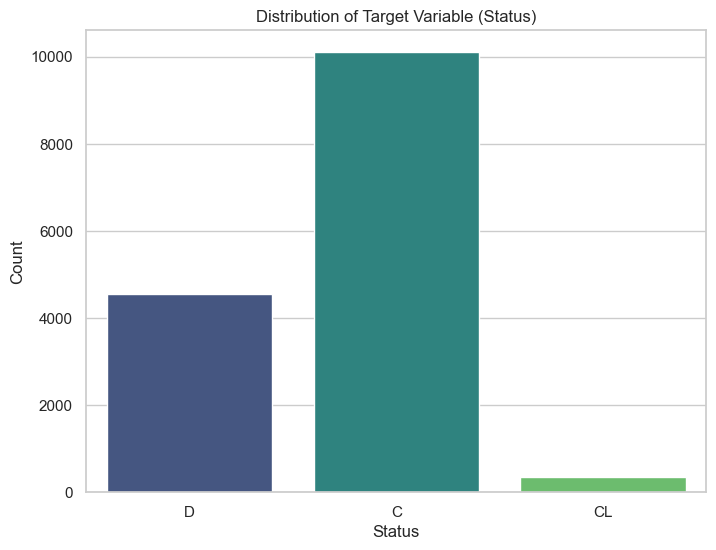

C:\Users\Mahdawi\AppData\Local\Temp\ipykernel_5012\3075234669.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[col], shade=True, color="teal", alpha=0.6)
C:\Users\Mahdawi\AppData\Local\Temp\ipykernel_5012\3075234669.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[col], shade=True, color="teal", alpha=0.6)
C:\Users\Mahdawi\AppData\Local\Temp\ipykernel_5012\3075234669.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train_df[col], shade=True, color="teal", alpha=0.6)
C:\Users\Mahdawi\AppData\Local\Temp\ipykernel_5012\3075234669.py:53: FutureWarning: 

`shade` is now deprecated in favor of `fi

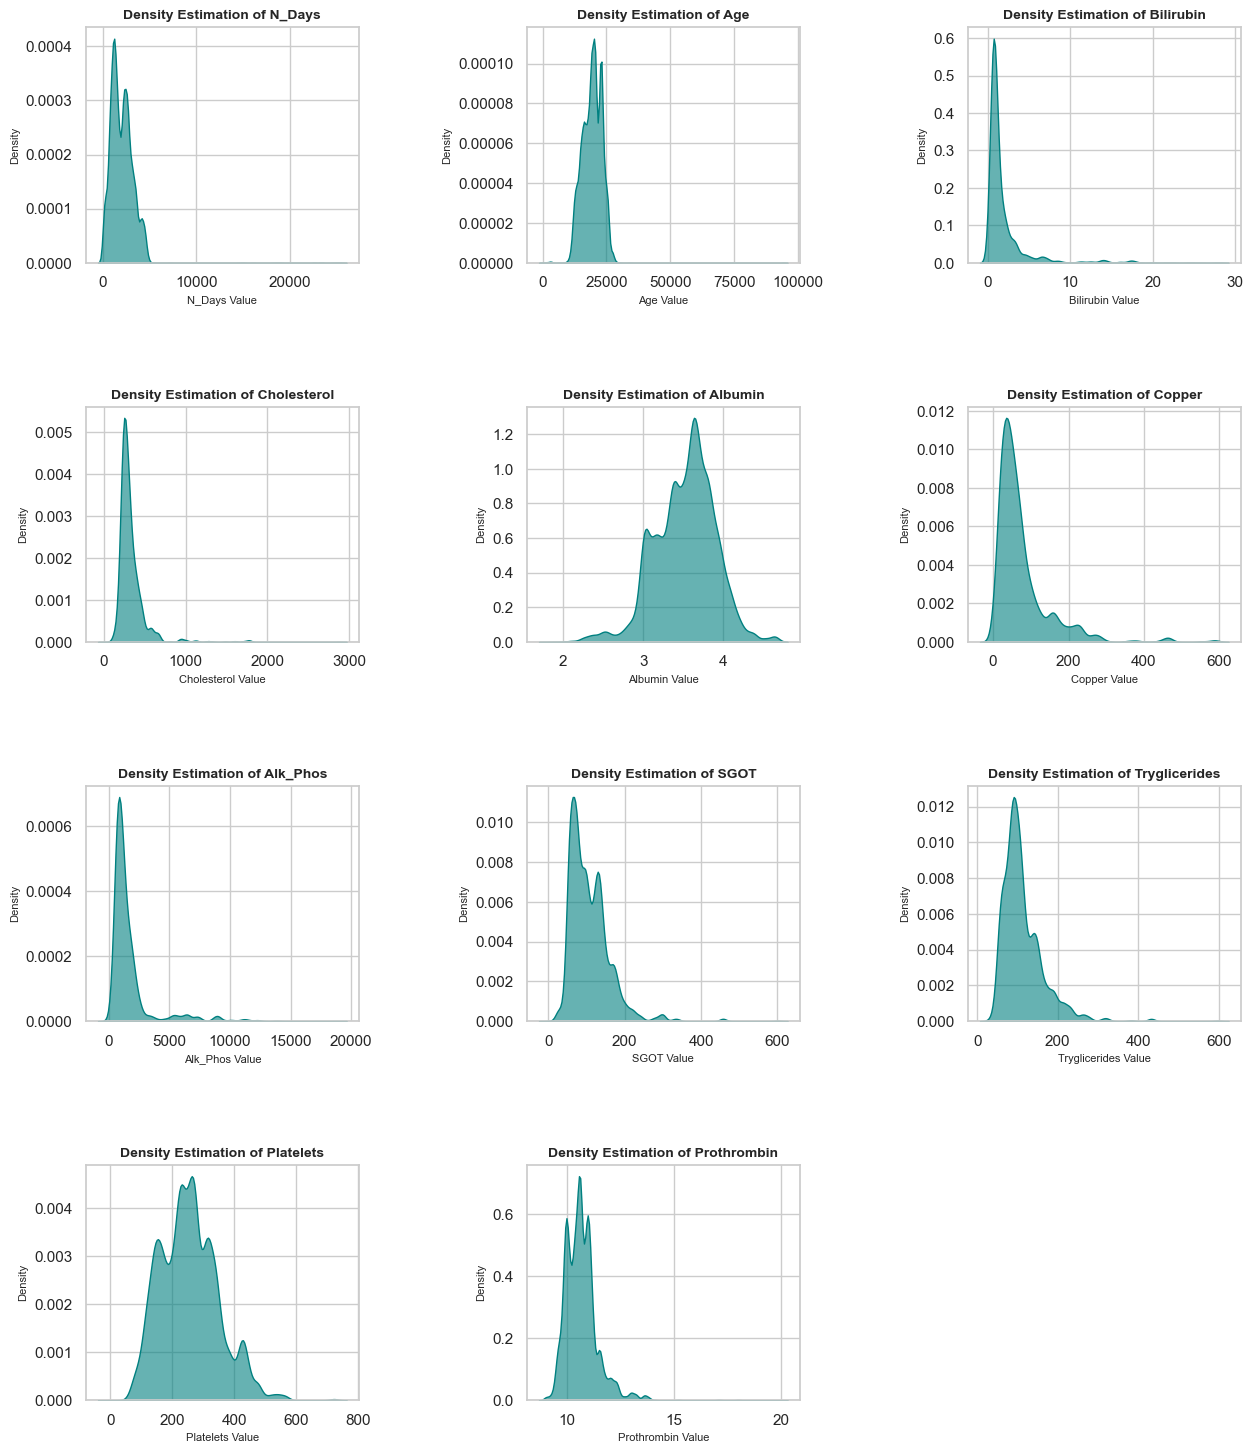

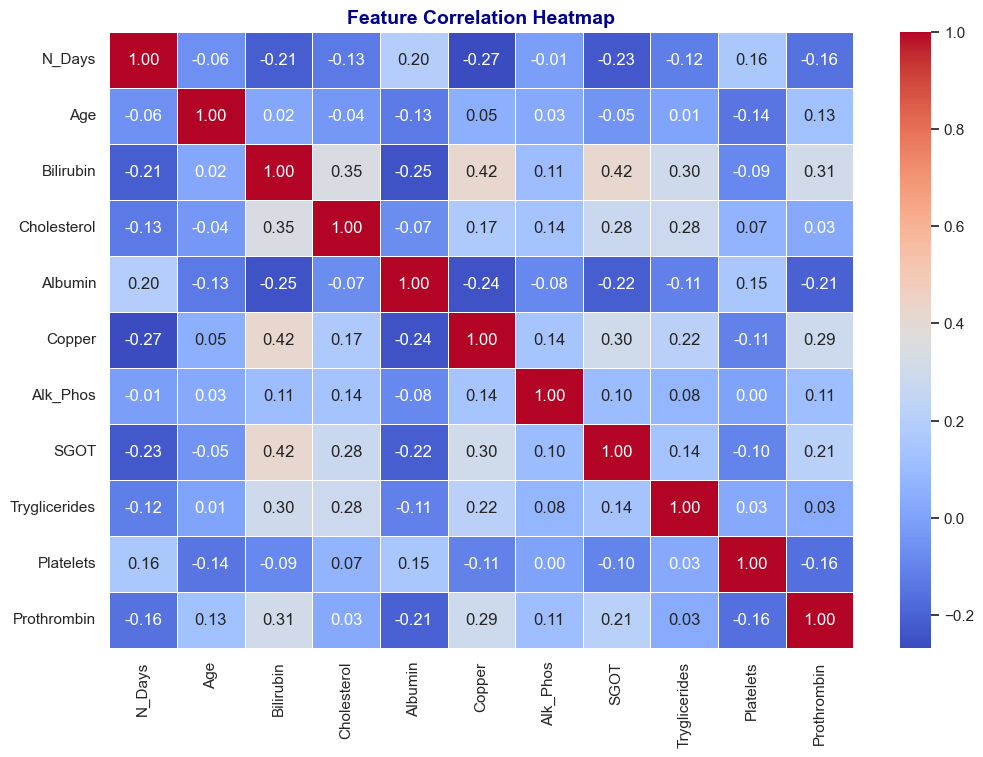

C:\Users\Mahdawi\AppData\Local\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:43:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


   id  Status_C  Status_CL  Status_D
0   1  0.036701   0.404630  0.558669
1   2  0.000506   0.000022  0.999472
2   3  0.998808   0.000552  0.000640
3   4  0.834517   0.009103  0.156379
4   5  0.872389   0.001549  0.126062


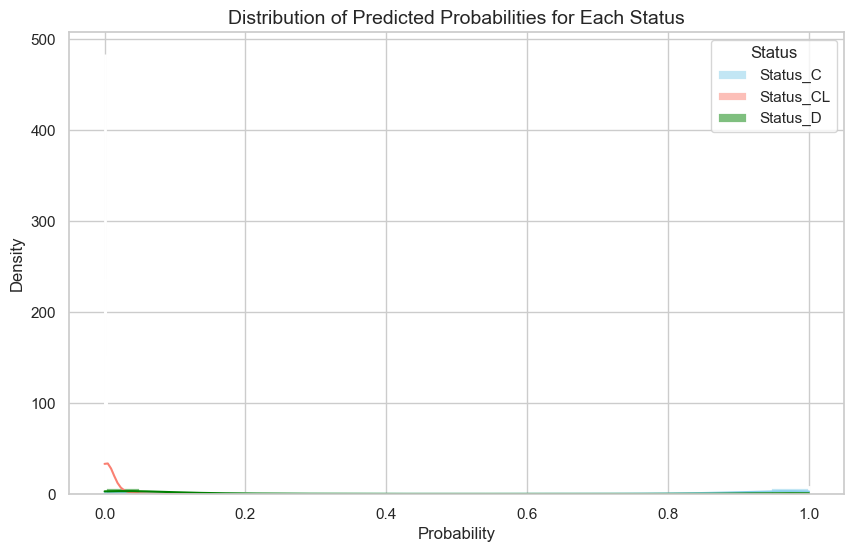

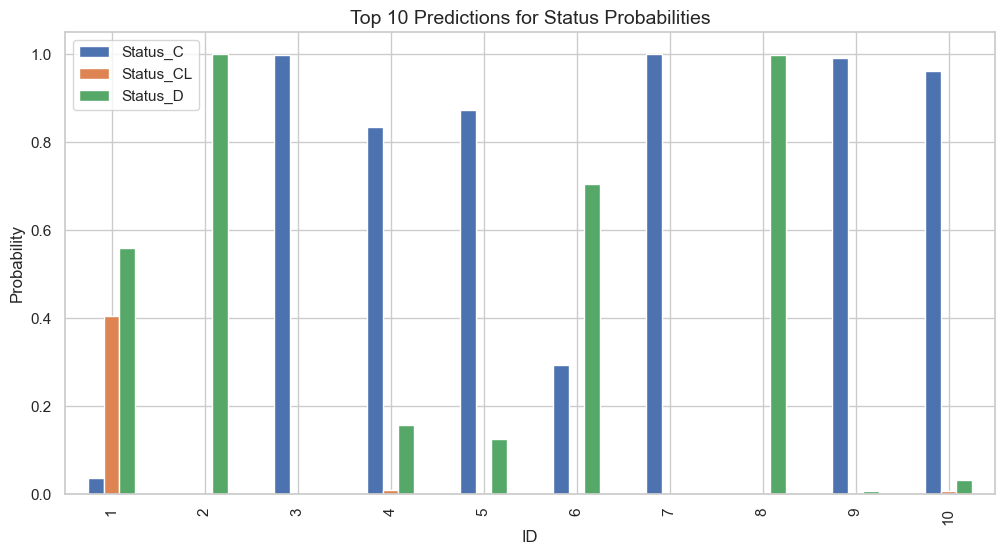

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import math

# Load Data
# Load the training and test datasets from CSV files
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

# Drop 'id' column (not useful for model training)
train_df = train_df.drop(columns=['id'])
test_df = test_df.drop(columns=['id'])

# Exploratory Data Analysis (EDA)
# Summary statistics to understand data distribution
print(train_df.describe())
print(train_df.info())

# Checking for missing values in dataset
print(train_df.isnull().sum())

# Visualizing the distribution of the target variable (Status)
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=train_df, palette='viridis')
plt.title("Distribution of Target Variable (Status)")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()

# Identify numerical columns
num_cols = train_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_cols.remove('Stage')  # Exclude target variable

# Create a Kernel Density Estimate (KDE) plot to visualize the density distribution
num_plots = len(num_cols)
ncols = 3  # Number of columns
nrows = math.ceil(num_plots / ncols)  # Calculate the required number of rows

# Adjust the figure size to make the subplots taller
plt.figure(figsize=(14, nrows * 4))  # Adjust height for better subplot spacing
for i, col in enumerate(num_cols, 1):
    plt.subplot(nrows, ncols, i)  # Create a dynamic subplot grid
    sns.kdeplot(train_df[col], shade=True, color="teal", alpha=0.6)
    plt.title(f"Density Estimation of {col}", fontsize=10, fontweight='bold')  # Reduce title font size
    plt.xlabel(f'{col} Value', fontsize=8)  # Reduce x-axis label font size
    plt.ylabel("Density", fontsize=8)  # Reduce y-axis label font size

# Adjust the vertical space between rows (increase hspace for better separation)
plt.subplots_adjust(hspace=0.6, wspace=0.4)  # Increase hspace to separate the rows more

# Apply tight layout to further adjust and avoid overlap
plt.tight_layout(pad=5.0)  # Increase the pad for better spacing
plt.show()

# Heatmap to check feature correlations
plt.figure(figsize=(12, 8))
sns.heatmap(train_df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=14, fontweight='bold', color='darkblue')
plt.show()

# Handling missing values
# Impute missing numerical values with median
num_imputer = SimpleImputer(strategy='median')
train_df[num_cols] = num_imputer.fit_transform(train_df[num_cols])
test_df[num_cols] = num_imputer.transform(test_df[num_cols])

# Identify categorical columns
cat_cols = train_df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('Status')

# Impute missing categorical values with most frequent category
cat_imputer = SimpleImputer(strategy='most_frequent')
train_df[cat_cols] = cat_imputer.fit_transform(train_df[cat_cols])
test_df[cat_cols] = cat_imputer.transform(test_df[cat_cols])

# Encoding categorical variables
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    train_df[col] = le.fit_transform(train_df[col])
    test_df[col] = le.transform(test_df[col])
    label_encoders[col] = le

# Encode the target variable
target_encoder = LabelEncoder()
train_df['Status'] = target_encoder.fit_transform(train_df['Status'])

# Feature Scaling
scaler = StandardScaler()
train_df[num_cols] = scaler.fit_transform(train_df[num_cols])
test_df[num_cols] = scaler.transform(test_df[num_cols])

# Train-Test Split
X = train_df.drop(columns=['Status'])
y = train_df['Status']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Train & Evaluate Models
model_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    report = classification_report(y_val, y_pred, output_dict=True)
    conf_matrix = confusion_matrix(y_val, y_pred)
    model_results[name] = {"Accuracy": acc, "Classification Report": report, "Confusion Matrix": conf_matrix}

# Choose Best Model (XGBoost was selected based on performance)
best_model = models["XGBoost"]

# Ensure that the target classes are in the right order
status_classes = target_encoder.classes_

# Get predicted probabilities for the test set using the best model
test_probs = best_model.predict_proba(test_df)

# Create a DataFrame to store the predictions
probabilities_df = pd.DataFrame(test_probs, columns=status_classes)

# Prepare the submission format
submission = pd.DataFrame({
    "id": range(1, len(test_probs) + 1),
    "Status_C": probabilities_df[status_classes[0]],
    "Status_CL": probabilities_df[status_classes[1]],
    "Status_D": probabilities_df[status_classes[2]]
})

# Save the submission to a CSV file
submission.to_csv("submission.csv", index=False)

# Output the first few rows to check the result
print(submission.head())

# Re-import the submission.csv to plot the results
submission_df = pd.read_csv("submission.csv")

# Plot the probabilities of each status
plt.figure(figsize=(10, 6))
sns.histplot(submission_df['Status_C'], kde=True, color="skyblue", label='Status_C', stat="density", linewidth=2)
sns.histplot(submission_df['Status_CL'], kde=True, color="salmon", label='Status_CL', stat="density", linewidth=2)
sns.histplot(submission_df['Status_D'], kde=True, color="green", label='Status_D', stat="density", linewidth=2)
plt.title("Distribution of Predicted Probabilities for Each Status", fontsize=14)
plt.xlabel("Probability", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Status")
plt.grid(True)
plt.show()

# Create a bar plot to compare the probabilities for each ID
submission_df.set_index('id')[['Status_C', 'Status_CL', 'Status_D']].head(10).plot(kind='bar', figsize=(12, 6))
plt.title("Top 10 Predictions for Status Probabilities", fontsize=14)
plt.xlabel("ID", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.grid(True)
plt.show()
